In [1]:
import torch
import pandas as pd
import numpy as np
import yaml
import importlib
import sys
import os
import matplotlib.pyplot as plt
import glob
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import warnings
stf_dir = os.path.join(os.pardir, 'spacetimeformer')

sys.path.append(stf_dir)


import spacetimeformer as stf
importlib.reload(stf) #to make sure the last version of stf is used

from torch.distributions import Normal
import pickle

In [26]:
os.listdir("..\\spacetimeformer\\spacetimeformer\\data\\stf_LOG_DIR\\wandb\\")

['run-20220309_144454-tq5nzspb',
 'run-20220309_145450-3nzjwnv9',
 'run-20220309_160528-dncdoo7o',
 'run-20220309_162332-1wvm6y6m',
 'run-20220309_162357-142148s6',
 'run-20220309_163828-1p01uoj3',
 'run-20220309_175332-1zbkkp2a',
 'run-20220309_175357-16nfo94h',
 'run-20220309_180329-3foofrtb',
 'run-20220310_133006-gxxfap3n',
 'run-20220310_134344-2wrqohoq',
 'run-20220311_143155-1qph7vgp',
 'run-20220311_143213-3camjv6f',
 'run-20220311_143924-3asnwyy9',
 'run-20220311_144132-3fwfsn6w',
 'run-20220311_145607-3ficlwez',
 'run-20220311_171546-3gxv9qle',
 'run-20220311_174834-ym4uvfpv',
 'run-20220311_174915-3pwi5dx8',
 'run-20220311_175054-32lr4vqw',
 'run-20220314_090524-14ssgdk9',
 'run-20220314_092703-2vahwf14',
 'run-20220314_092732-1uhy3tbv',
 'run-20220314_092812-156pzr5x',
 'run-20220314_132645-2tdi8anz',
 'run-20220314_132715-1vlskdzo',
 'run-20220315_103112-3nbf1la4',
 'run-20220315_103139-2kfujejz',
 'run-20220315_105704-26gojq82',
 'run-20220315_110033-6g39nco2',
 'run-2022

In [27]:
'''#lstm_1_day_forecast_cyanochla
run_names = ['run-20220414_140439-3gftvviu', #fold 4
             'run-20220414_143813-1joxekzi', #fold 3
             'run-20220414_151324-3kt91dit', #fold 2
             'run-20220414_163024-e50mqup8', #fold 1
             'run-20220414_164744-14ts2nmq'] #fold 0
             '''
'''
#15_days_pred_cyanochla_small
run_names=[  'run-20220421_092743-3kfgcace', #fold 9
             'run-20220421_100142-20h0ln6b', #fold 8
             'run-20220421_104159-1wnwyiw4', #fold 7
             'run-20220421_105526-glu4yn6r', #fold 6
             'run-20220421_110704-14i1crey', #fold 5
             'run-20220421_112151-om5e5jmh', #fold 4
             'run-20220421_114003-3o9f257q', #fold 3
             'run-20220421_120953-3fdp0nzt', #fold 2
             'run-20220421_122244-hkduw4k9', #fold 1
             'run-20220421_123814-3jnpo6kt'] #fold 0
'''
'''
#30_days_pred_cyanochla_less_small
run_names=[ 'run-20220421_131548-36mneh49',
             'run-20220421_134959-3izx5sk5',
             'run-20220421_140940-28ev888f',
             'run-20220421_142746-2ke8mi51',
             'run-20220421_144104-1pduz55n',
             'run-20220421_145721-77ibv141',
             'run-20220421_151957-tzl3fzrq',
             'run-20220421_155200-1wi6muy1',
             'run-20220421_161816-1u6lanom',
            'run-20220421_163852-2ocggok7'] #fold 0
'''
run_names=[
 'run-20220501_121322-3bxkjfca',
 'run-20220501_121506-3dtud0nj',
 'run-20220501_122601-1o8gd8to',
 'run-20220501_131626-13w6t31n',
 'run-20220501_133251-2khd7ckf',
 'run-20220501_134905-2eagmjsr',
 'run-20220501_140547-fon0nd81',
 'run-20220501_141748-huv6416u',
 'run-20220501_142916-kcr3hknv',
 'run-20220501_144051-1ow7fdxk',
 'run-20220501_145827-2x0tvxpn',]
run_names=[
 'run-20220501_164423-1jg8sfd2',
 'run-20220501_170145-3pxb1e2e',
 'run-20220501_182745-t886lin7',
 'run-20220501_184139-2h9lsz9j',
 'run-20220501_190719-1ntzk92u',
 'run-20220501_192103-3ft1ne4h',
 'run-20220501_233443-3i5bxssg',
 'run-20220501_234535-2z0whq99',
 'run-20220501_235550-1nevxs23',
 'run-20220502_000508-2l2k5p7k']
run_names =  ['run-20220502_191721-2tdnutj7',
             'run-20220502_221715-34wgkdia',
             'run-20220502_232040-ixzvcctz',
             'run-20220502_233202-21q1icdy',
             'run-20220502_234357-345w6g6p',
             'run-20220502_235445-ovi0wq69',
             'run-20220503_001049-10j8mxbb',
             'run-20220503_002141-3calb0bt',
             'run-20220503_003146-eu4l8nd9',
             'run-20220503_004343-3t09sadw']
run_name = run_names[-1]
config_path = "..\\spacetimeformer\\spacetimeformer\\data\\stf_LOG_DIR\\wandb\\" + run_name+"\\files\\config.yaml"
with open(config_path) as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    config = yaml.load(file, Loader=yaml.FullLoader)
config_pross = {}
for key in config:
    try:
        config_pross[key]=config[key]['value']
    except:
        config_pross[key]=config[key]
config=config_pross
print("run name: "+config['run_name'])
print("model used: "+config['model'])
print("dataset used: "+config['dset'])
print("fold: "+str(config['fold_val']))

run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_cluster_HF_int5
fold: 0


In [28]:
config['dset']

'log_cluster_HF_int5'

In [29]:
#build the dset

if config['dset'] =='HF_int' or config['dset'] == 'HF_noint' or config['dset'] == 'HF_int4':
    data_path = config['data_path']
    date_format = "%Y-%m-%d %H:%M:%S"
    if data_path == 'auto':
        if config['dset'] =='HF_int':
            data_path = "../Datasets/Forecasting_Aqua/data_h_rolling_cst_int.csv"
        if config['dset'] == 'HF_noint':
            data_path = "../Datasets/Forecasting_Aqua/data_h_rolling_v4.csv"
        if config['dset'] == 'HF_int4':
            data_path = "../Datasets/Forecasting_Aqua/data_h_rolling_interpolated_v4.csv"
    df = pd.read_csv(data_path)
    target_cols = ['mean_chla_depth','aphanizomenon']
    target_cols+=list(df.keys().drop(['Datetime','mean_chla_depth','aphanizomenon']))
    NULL_VAL = 0.
if config['dset']=='log_cluster_HF_int4':
    date_format = "%Y-%m-%d %H:%M"
    data_path = "../Datasets/Forecasting_Aqua/data_h_log_cst_int_clusters_v4.csv"
    df = pd.read_csv(data_path)
    target_cols = ['mean_chla_depth']
    target_cols+=list(df.keys().drop(['Datetime','mean_chla_depth']))
    NULL_VAL = 0.  
if config['dset']=='log_cluster_HF_int5':
    date_format = "%Y-%m-%d %H:%M"
    data_path = "../Datasets/Forecasting_Aqua/data_h_log_cst_int_clusters_v5.csv"
    df = pd.read_csv(data_path)
    target_cols = ['mean_chla_depth']
    target_cols+=list(df.keys().drop(['Datetime','mean_chla_depth']))
    NULL_VAL = 0.  
dset = stf.data.CSVTimeSeriesV2(
    data_path=data_path,
    target_cols=target_cols,
    date_format = date_format,
    nanval = NULL_VAL,
    folds = config['folds'],
    fold_n = config['fold_val'],
)

x_dim = 4 if 'HF' in config['dset'] else 3
y_dim = len(target_cols)
loss_w = torch.zeros(y_dim)
loss_w[0] = 1
loss_w /=loss_w.sum()

#build the model

if config['model'] == "lstm":
    forecaster = stf.lstm_model.LSTM_Forecaster(
        # encoder
        d_x=x_dim,
        d_y=y_dim,
        time_emb_dim=config['time_emb_dim'],
        hidden_dim=config['hidden_dim'],
        n_layers=config['n_layers'],
        dropout_p=config['dropout_p'],
        # training
        learning_rate=config['learning_rate'],
        teacher_forcing_prob=config['teacher_forcing_start'],
        l2_coeff=config['l2_coeff'],
        loss=config['loss'],
        linear_window=config['linear_window'],
    )
else:
    print(f"{config['model']} model not implemented")


In [30]:
config['folds']

10

In [31]:
#load the checkpoints
checkpoints_dir = "..\\spacetimeformer\\data\\stf_model_checkpoints\\"
run_name = config['run_name']

checkpoints = glob.glob(checkpoints_dir+run_name+"_"+"[0-9]*\\*\\*",recursive=True)
checkpoint = checkpoints[-config['fold_val']]
checkpoints

['..\\spacetimeformer\\data\\stf_model_checkpoints\\trial_clustersv2_log_weited_181024650\\trial_clustersv2_log_weitedepoch=43-val\\loss=1.72.ckpt',
 '..\\spacetimeformer\\data\\stf_model_checkpoints\\trial_clustersv2_log_weited_191313762\\trial_clustersv2_log_weitedepoch=01-val\\loss=0.72.ckpt',
 '..\\spacetimeformer\\data\\stf_model_checkpoints\\trial_clustersv2_log_weited_316420575\\trial_clustersv2_log_weitedepoch=00-val\\loss=2.71.ckpt',
 '..\\spacetimeformer\\data\\stf_model_checkpoints\\trial_clustersv2_log_weited_431130815\\trial_clustersv2_log_weitedepoch=02-val\\loss=1.57.ckpt',
 '..\\spacetimeformer\\data\\stf_model_checkpoints\\trial_clustersv2_log_weited_617394142\\trial_clustersv2_log_weitedepoch=00-val\\loss=1.30.ckpt',
 '..\\spacetimeformer\\data\\stf_model_checkpoints\\trial_clustersv2_log_weited_641116369\\trial_clustersv2_log_weitedepoch=01-val\\loss=1.36.ckpt',
 '..\\spacetimeformer\\data\\stf_model_checkpoints\\trial_clustersv2_log_weited_720377082\\trial_clustersv

In [32]:
forecaster.load_state_dict(torch.load(checkpoint)['state_dict'],strict=True)

<All keys matched successfully>

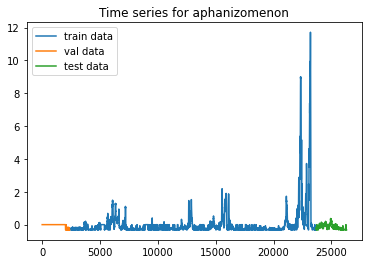

In [33]:
key = 'aphanizomenon'
y_train = dset.train_data[key]
y_val = dset.val_data[key]
y_test = dset.test_data[key]
plt.plot(dset.train_data.index,y_train)
plt.plot(dset.val_data.index,y_val)
plt.plot(dset.test_data.index,y_test)
plt.title(f"Time series for {key}")
plt.legend(["train data","val data","test data"])
plt.show()

In [34]:
#format the dataset into x and y:
x_train = (dset.train_data[['Day','Month','Year','Hour']] if 'HF' in config['dset'] 
           else dset.train_data[['Day','Month','Year']])
y_train = dset.train_data[target_cols]

x_val = (dset.val_data[['Day','Month','Year','Hour']] if 'HF' in config['dset'] 
        else dset.val_data[['Day','Month','Year']])
y_val = dset.val_data[target_cols]

x_test = (dset.test_data[['Day','Month','Year','Hour']] if 'HF' in config['dset'] 
          else dset.test_data[['Day','Month','Year']])
y_test = dset.test_data[target_cols]

In [35]:
#predict all results
res = {}
true = {}
ctx = config['context_points']
trg = config['target_points']
if config['time_resolution_ctx'] is not None:
    time_res_ctx = config['time_resolution_ctx']
    time_res_trg = config['time_resolution_trg']
else:
    time_res_ctx = config['time_resolution']
    time_res_trg = config['time_resolution']

batch_size = 100

def generate_batch(list_of_tuple, batch_size):
    if batch_size<=0:
        return
    for i in range(0, len(list_of_tuple), batch_size):
        yield (torch.cat([el[0].unsqueeze(0) for el in list_of_tuple[i : i + batch_size]]),
               torch.cat([el[1].unsqueeze(0) for el in list_of_tuple[i : i + batch_size]]),
               torch.cat([el[2].unsqueeze(0) for el in list_of_tuple[i : i + batch_size]]),
               torch.cat([el[3].unsqueeze(0) for el in list_of_tuple[i : i + batch_size]]),
              )
        
        
for x,y,split in [(x_train,y_train,'train'),(x_val,y_val,'val'),(x_test,y_test,'test')]:
    x = torch.tensor(x.values,dtype=torch.float32)
    y = torch.tensor(y.values,dtype=torch.float32)
    res[split]=[]
    true[split]=[]
    print(f"split: {split}      ")
    
        
    if (len(dset.idxbreaks)==2 or split != 'train'):
        slice_start = [i for i in range(0,
                                       (dset.length(split)
                                       - time_res_trg * trg
                                       - time_res_ctx * ctx),
                                       )
                                ]
    else:
        slice_start = [i for i in range(0,
                                       (dset.idxbreaks[0]
                                       - time_res_trg * trg
                                       - time_res_ctx * ctx),
                                       )
                                ]
        slice_start+= [i for i in range(dset.idxbreaks[0],
                                       (dset.length(split)
                                       - time_res_trg * trg
                                       - time_res_ctx * ctx),
                                       )
                                ]
    #build slices:
    input_list = []
    for idx in slice_start:
        x_ctx = x[idx:idx+ctx*time_res_ctx:time_res_ctx]
        x_trg = x[idx+ctx*time_res_ctx + time_res_trg-time_res_ctx :
                  idx+ctx*time_res_ctx + time_res_trg-time_res_ctx + trg*time_res_trg:
                  time_res_trg]
        y_ctx = y[idx:idx+ctx*time_res_ctx:time_res_ctx]
        y_trg = y[idx+ctx*time_res_ctx + time_res_trg-time_res_ctx :
                  idx+ctx*time_res_ctx + time_res_trg-time_res_ctx + trg*time_res_trg:
                  time_res_trg]
        input_list.append((x_ctx,y_ctx,x_trg,y_trg))
        
    gen = generate_batch(input_list, batch_size)
    
    for idx,(x_ctx,y_ctx,x_trg,y_trg) in enumerate(gen):
        print(f"{idx+1}/{len(input_list)/batch_size}",end='\r')
        with torch.no_grad():
            res_idx,*class_res=forecaster(x_ctx,y_ctx,x_trg,y_trg,**forecaster.eval_step_forward_kwargs)
            if isinstance(res_idx,Normal):
                res[split].append(res_idx.loc.squeeze())
            else:
                res[split].append(res_idx)
                true[split].append(y_trg)


split: train      
split: val      
split: test      


In [36]:
# only keep the usefull columns:
res_target = {}
true_target = {}
if config['loss_w'] is None:
    config['loss_w']=y_dim*[1]
for split in ['train','val','test']:
    res_target[split]= torch.cat(res[split])[:,:,:len(config['loss_w'])]
    true_target[split]=torch.cat(true[split])[:,:,:len(config['loss_w'])]

In [37]:
dset.idxbreaks

[2368, 23674]

In [38]:
torch.cat([el for el in true['val']])[:,:,1].mean()

tensor(-0.0185)

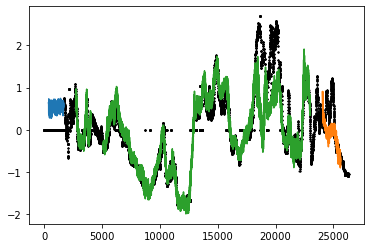

In [39]:
#for prediction:
key = 'mean_chla_depth'
#key = 'aphanizomenon'
key_lag = 1
idx = target_cols.index(key)

context_span = ctx*time_res_ctx
tot_pred_span = trg*time_res_trg
past_pred_span = key_lag*time_res_trg
next_pred_span = (trg-key_lag)*time_res_trg
for data,split in zip([dset.train_data,dset.val_data,dset.test_data],['train','val','test']):
    if split == 'train':
        
        plt.plot(data.index[context_span+past_pred_span:
                            dset.idxbreaks[0]-next_pred_span],
                 res_target[split][:dset.idxbreaks[0]-context_span-tot_pred_span,key_lag-1,idx],
                 color='tab:green')
        
        plt.plot(data.index[dset.idxbreaks[0]+context_span+past_pred_span:
                            len(data)-next_pred_span],
                 res_target[split][dset.idxbreaks[0]:
                                    len(data)-next_pred_span,key_lag-1,idx],
                 color='tab:green')
    else:
        
        plt.plot(data.index[context_span+past_pred_span:len(data)-next_pred_span],
                 res_target[split][:,key_lag-1,idx])
    plt.scatter(data.index,data[key],s=1,c='k')
    #plt.scatter(dset.val_data.index,dset.val_data[key],s=1)
    
    #plt.scatter((data.index+(ctx-1)*time_res_ctx+time_res_trg)[:len(res_target[split])],res_target[split][:,0,idx],s=1)
    #plt.scatter((data.index+(ctx-1)*time_res_ctx+time_res_trg)[:len(res_target[split])],true_target[split][:,0,idx],s=1)


In [40]:
#R2:
keys= ['mean_chla_depth','aphanizomenon']

for key in keys:
    idx = target_cols.index(key)
    print(f"Score for {key}")
    for split in ['train','val','test']:
        r2 =1-(torch.sum(torch.square(true_target[split][...,idx]-res_target[split][...,idx]))/
               torch.sum(torch.square(true_target[split][...,idx]-true_target[split][...,idx].mean())))
        print(f"Nash score for the {split}: {r2}")

Score for mean_chla_depth
Nash score for the train: 0.749248743057251
Nash score for the val: -6.208255767822266
Nash score for the test: 0.35643547773361206
Score for aphanizomenon
Nash score for the train: 0.8271420001983643
Nash score for the val: -11.205744743347168
Nash score for the test: -5.725583553314209


## K-Fold validation:

In [41]:
res_fold = []
true_fold = []
for run in run_names:
    config_path = "..\\spacetimeformer\\spacetimeformer\\data\\stf_LOG_DIR\\wandb\\" + run+"\\files\\config.yaml"
    with open(config_path) as file:
        # The FullLoader parameter handles the conversion from YAML
        # scalar values to Python the dictionary format
        config = yaml.load(file, Loader=yaml.FullLoader)
    config_pross = {}
    for key in config:
        try:
            config_pross[key]=config[key]['value']
        except:
            config_pross[key]=config[key]
    config=config_pross
    print("run name: "+config['run_name'])
    print("model used: "+config['model'])
    print("dataset used: "+config['dset'])
    print("fold: "+str(config['fold_val']))
    
    
    #rebuild the dataset for each fold
    if config['dset'] =='HF_int' or config['dset'] == 'HF_noint' or config['dset'] == 'HF_int4':
        data_path = config['data_path']
        date_format = "%Y-%m-%d %H:%M:%S"
        if data_path == 'auto':
            if config['dset'] =='HF_int':
                data_path = "../Datasets/Forecasting_Aqua/data_h_rolling_cst_int.csv"
            if config['dset'] == 'HF_noint':
                data_path = "../Datasets/Forecasting_Aqua/data_h_rolling_v4.csv"
            if config['dset'] == 'HF_int4':
                data_path = "../Datasets/Forecasting_Aqua/data_h_rolling_interpolated_v4.csv"
    if config['dset']=='log_cluster_HF_int4':
        date_format = "%Y-%m-%d %H:%M"
        data_path = "../Datasets/Forecasting_Aqua/data_h_log_cst_int_clusters_v4.csv"
    df = pd.read_csv(data_path)
    target_cols = ['mean_chla_depth','aphanizomenon']
    target_cols+=list(df.keys().drop(['Datetime','mean_chla_depth','aphanizomenon']))
    NULL_VAL = 0.

    dset = stf.data.CSVTimeSeriesV2(
        data_path=data_path,
        target_cols=target_cols,
        date_format = date_format,
        nanval = NULL_VAL,
        folds = config['folds'],
        fold_n = config['fold_val'],
    )
    # use the same model as previously defined,and
    #load the checkpoints
    checkpoints_dir = "..\\spacetimeformer\\data\\stf_model_checkpoints\\"
    run_name = config['run_name']
    salt = ""

    checkpoints = glob.glob(checkpoints_dir+run_name+"_"+"[0-9]*\\*\\*",recursive=True)
    checkpoint = checkpoints[config['folds']-config['fold_val']-1]
    #checkpoint = checkpoints[config['fold_val']]
    forecaster.load_state_dict(torch.load(checkpoint)['state_dict'],strict=True)
    
    #format the dataset into x and y:
    x_val = (dset.val_data[['Day','Month','Year','Hour']] if 'HF' in config['dset'] 
            else dset.val_data[['Day','Month','Year']])
    y_val = dset.val_data[target_cols]

    x_test = (dset.test_data[['Day','Month','Year','Hour']] if 'HF' in config['dset'] 
              else dset.test_data[['Day','Month','Year']])
    y_test = dset.test_data[target_cols]
    
    
    y_train = dset.train_data[target_cols]
    
    #predict all results
    res = {'fold':config['fold_val']}
    true = {'fold':config['fold_val']}
    ctx = config['context_points']
    trg = config['target_points']
    res['mean_train'] = np.nanmean(y_train,axis=0)
    if config['time_resolution_ctx'] is not None:
        time_res_ctx = config['time_resolution_ctx']
        time_res_trg = config['time_resolution_trg']
    else:
        time_res_ctx = config['time_resolution']
        time_res_trg = config['time_resolution']


    batch_size = 100
    
    for x,y,split in [(x_val,y_val,'val'),(x_test,y_test,'test')]:
        x = torch.tensor(x.values,dtype=torch.float32)
        y = torch.tensor(y.values,dtype=torch.float32)
        res[split]=[]
        true[split]=[]
        print(f"split: {split}      ")


        slice_start = [i for i in range(0,
                                       (dset.length(split)
                                       - time_res_trg * trg
                                       - time_res_ctx * ctx),
                                       )
                                ]

        #build slices:
        input_list = []
        for idx in slice_start:
            x_ctx = x[idx:idx+ctx*time_res_ctx:time_res_ctx]
            x_trg = x[idx+ctx*time_res_ctx + time_res_trg-time_res_ctx :
                      idx+ctx*time_res_ctx + time_res_trg-time_res_ctx + trg*time_res_trg:
                      time_res_trg]
            y_ctx = y[idx:idx+ctx*time_res_ctx:time_res_ctx]
            y_trg = y[idx+ctx*time_res_ctx + time_res_trg-time_res_ctx :
                      idx+ctx*time_res_ctx + time_res_trg-time_res_ctx + trg*time_res_trg:
                      time_res_trg]
            input_list.append((x_ctx,y_ctx,x_trg,y_trg))

        gen = generate_batch(input_list, batch_size)
        
        for idx,(x_ctx,y_ctx,x_trg,y_trg) in enumerate(gen):
            print(f"{idx+1}/{len(input_list)/batch_size}",end='\r')
            with torch.no_grad():
                res_idx,*class_res=forecaster(x_ctx,y_ctx,x_trg,y_trg,**forecaster.eval_step_forward_kwargs)
                if isinstance(res_idx,Normal):
                    res[split].append(res_idx.loc.squeeze())
                else:
                    res[split].append(res_idx)
                    true[split].append(y_trg)
            
    res_fold.append(res)
    true_fold.append(true)

run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_cluster_HF_int5
fold: 9
split: val      
split: test      
run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_cluster_HF_int5
fold: 8
split: val      
split: test      
run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_cluster_HF_int5
fold: 7
split: val      
split: test      
run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_cluster_HF_int5
fold: 6
split: val      
split: test      
run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_cluster_HF_int5
fold: 5
split: val      
split: test      
run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_cluster_HF_int5
fold: 4
split: val      
split: test      
run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_cluster_HF_int5
fold: 3
split: val      
split: test      
run name: trial_clustersv2_log_weited
model used: lstm
dataset used: log_clu

In [42]:
true_target['val'][-1,0,1]

tensor(0.)

In [43]:
res_target['val'][-1,0,1]

tensor(-0.1877)

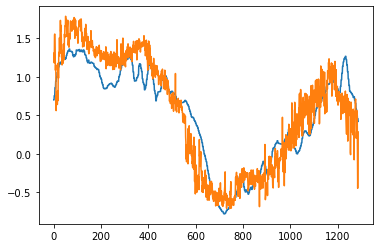

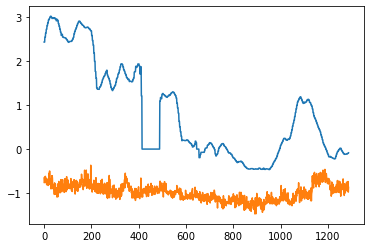

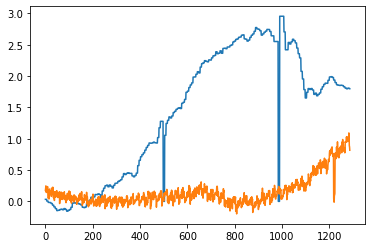

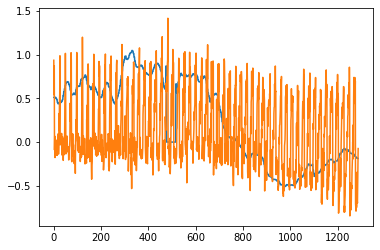

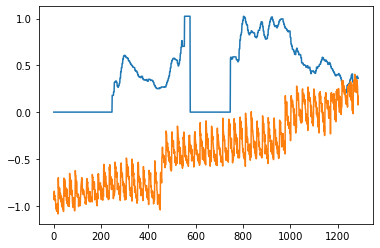

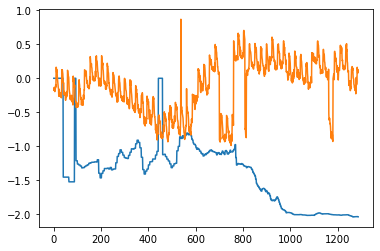

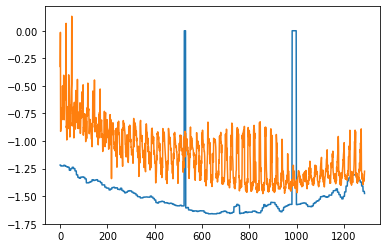

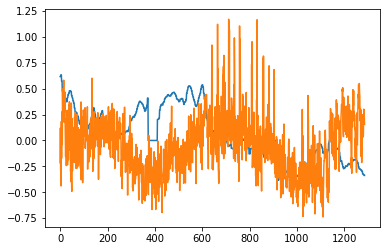

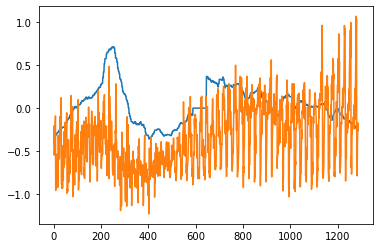

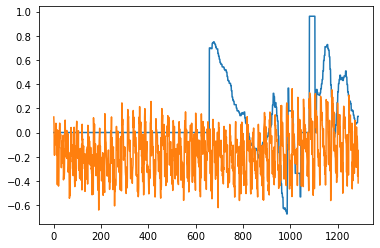

In [48]:
idx = 0
lag_to_plot = 29
if config['loss_w'] is None:
    config['loss_w']=[1]*len(target_cols)
for res,true in zip(res_fold,true_fold):
    for split in ['val','test']:
        res_target[split]= torch.cat(res[split])[:,:,:len(config['loss_w'])]
        true_target[split]=torch.cat(true[split])[:,:,:len(config['loss_w'])]
    
    plt.plot(true_target['val'][:,lag_to_plot,idx])
    plt.plot(res_target['val'][:,lag_to_plot,idx])
    plt.show()

In [45]:
true_last = torch.cat(true_fold[0]['val'])[:,:,:len(config['loss_w'])]

In [46]:
#compute the score on each fold 
keys = df.keys().drop('Datetime')
print("r2 on the validations sets (with the mean as the mean of the training set):")
lag = 1
r2_l = []
for idx,key in enumerate(keys):
    print(f"{key}:")
    for idx_fold,(res,true) in enumerate(zip(res_fold,true_fold)):
        res_loc = torch.cat([el for el in res['val']])[:,:,:len(config['loss_w'])]
        true_loc = torch.cat([el for el in true['val']])[:,:,:len(config['loss_w'])]
        nan_mask = true_loc!=0.
        r2 = 1- (torch.mean(nan_mask*torch.square(res_loc-true_loc),axis=0)/
                       (torch.mean(nan_mask *torch.square(true_loc-res['mean_train']),axis=0)+0.0001))
        r2_l.append(torch.unsqueeze(r2,0))
        print(f"r2 fold {10-idx_fold}: {r2[lag-1,idx]:.2f}")
    print(f"r2 mean: {torch.mean(torch.cat(r2_l),axis=0)[lag-1,idx]:.2f}")
r2_t = torch.cat(r2_l)

r2 on the validations sets (with the mean as the mean of the training set):
mean_chla_depth:


ValueError: operands could not be broadcast together with shapes (1287,30,11) (25,) 

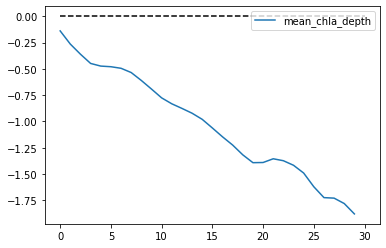

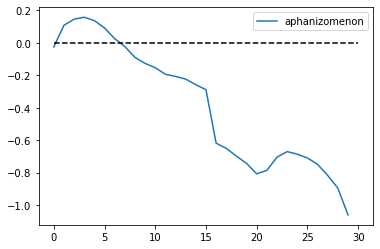

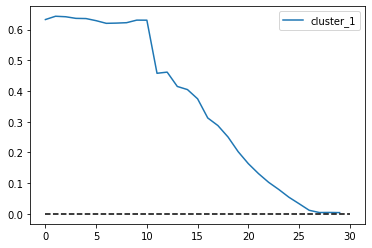

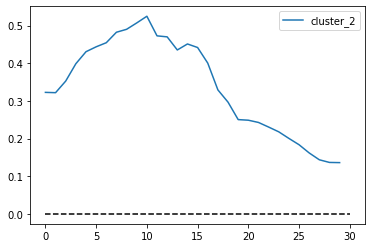

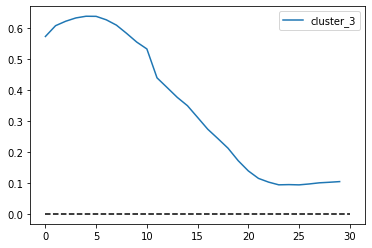

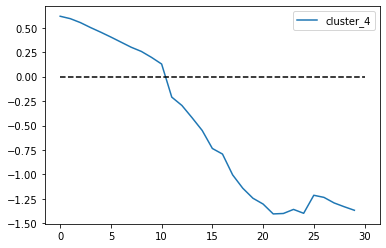

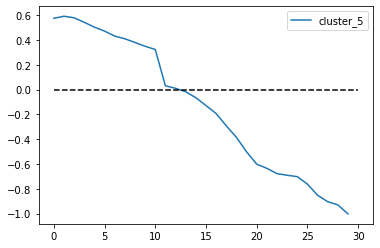

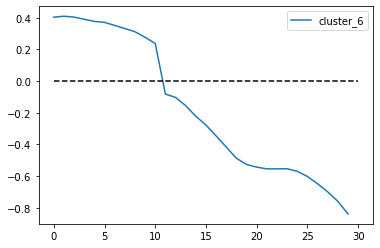

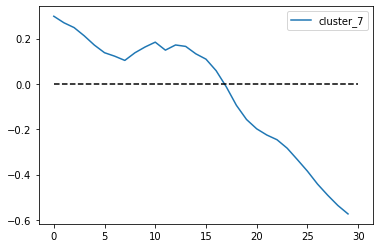

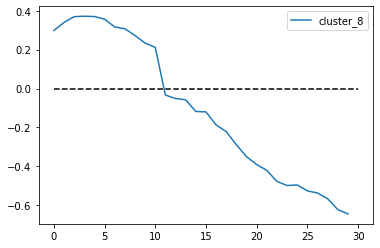

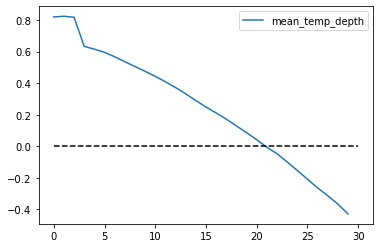

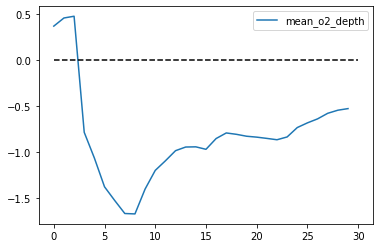

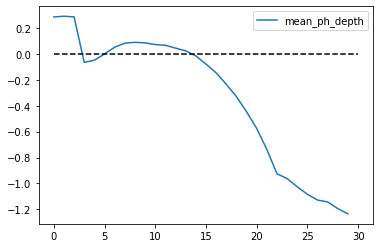

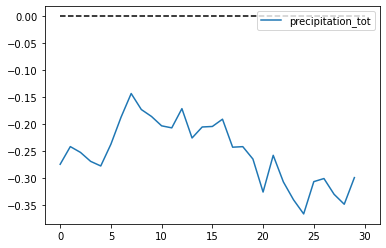

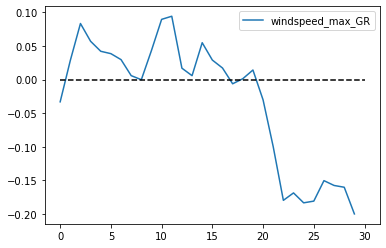

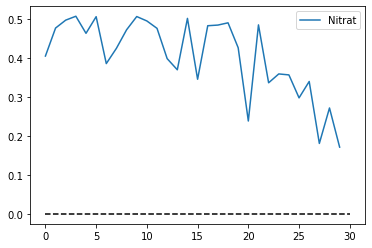

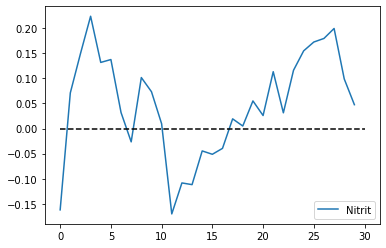

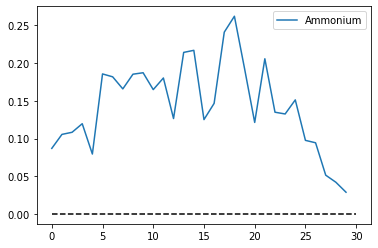

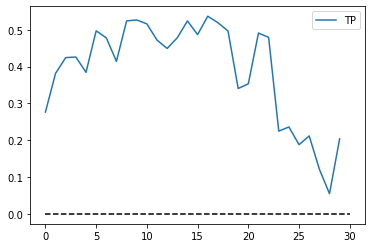

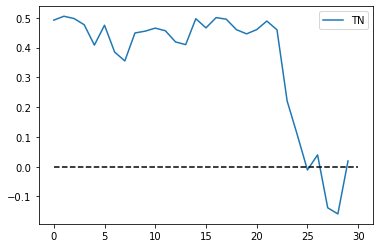

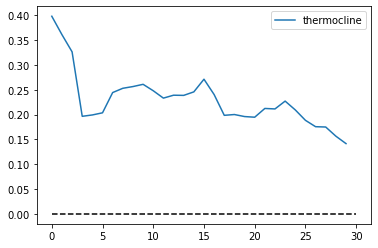

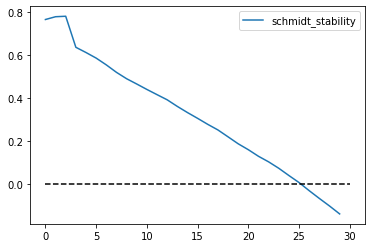

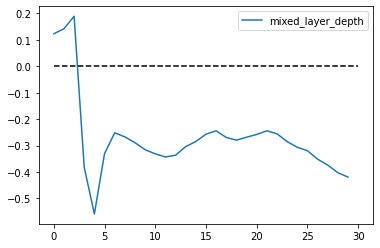

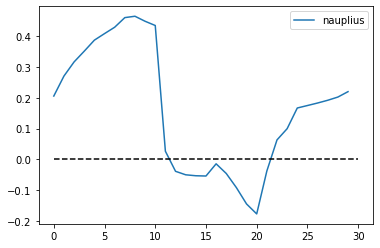

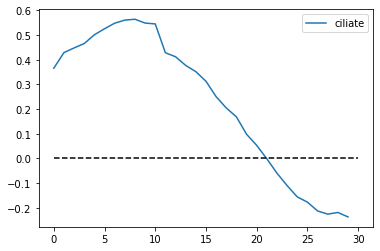

In [25]:
keys = df.keys().drop('Datetime')
for idx,key in enumerate(keys):
    plt.plot(torch.mean(r2_t,axis=0)[:,idx])
    plt.legend([key])
    plt.hlines(0,0,30,color='k',linestyle='dashed')
    plt.show()